In [5]:
import pandas as pd
import numpy as np
df1=pd.read_csv("C:/Users/Ivar/Downloads/data science proget/Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df1.groupby("area_type")["area_type"].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:

df2=df1.drop(['area_type',"society","balcony","availability"],axis='columns') 

In [8]:

df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:

df3['size'].unique()


array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) else x)

df3.head()

C:\Users\Ivar\AppData\Local\Temp\ipykernel_14008\3629244972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) else x)


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df3[~df3["total_sqft"].apply(is_float)].head(5)


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [16]:
 def convert_total_sqrt(x):
        token=x.split('-')
        if len(token)== 2:
            return(float(token[0])+float(token[1]))/2
        try:
            return float(x)
        except:
            return None
        
        

In [17]:
convert_total_sqrt("2100 - 2850")

2475.0

In [18]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_total_sqrt)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [19]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [20]:

df5=df4.copy()
df5["price_per_sqrt"]=df5['price']*10000/df5["total_sqft"]
df5.head() 

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000


In [21]:
df5.location=df5.location.apply(lambda x: x.strip())
location_satt=df.groupby('location')['location'].agg('count').sort_values(ascending =False)
location_satt

NameError: name 'df' is not defined

In [22]:
len(location_satt[location_satt<=10])
location_stat_less_11=location_satt[location_satt<=10]

NameError: name 'location_satt' is not defined

In [23]:
df5.location=df5.location.apply(lambda x:"other" if x in location_stat_less_11 else x)

NameError: name 'location_stat_less_11' is not defined

In [24]:
len(df5.location.unique())

1293

In [25]:
#to determine the outlier in the total area and the number of room 
df5.shape


(13246, 7)

In [26]:
#filter out the total areas divided by area which is less than 300 
#df5['total_sqft'] = pd.to_numeric(df5['total_sqft'], errors='coerce')

df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.loc[30]

location           Yelahanka
size                   4 BHK
total_sqft            2475.0
bath                     4.0
price                  186.0
bhk                        4
price_per_sqrt    751.515152
Name: 30, dtype: object

In [27]:
df6.price_per_sqrt.describe()

count    12456.000000
mean       630.850283
std        416.812734
min         26.782981
25%        421.052632
50%        529.411765
75%        691.666667
max      17647.058824
Name: price_per_sqrt, dtype: float64

In [28]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqrt)
        st=np.std(subdf.price_per_sqrt)
        reduced_df=subdf[(subdf.price_per_sqrt>(m-st))&(subdf.price_per_sqrt<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7=remove_pps_outliers(df6)
df7.shape

(9266, 7)

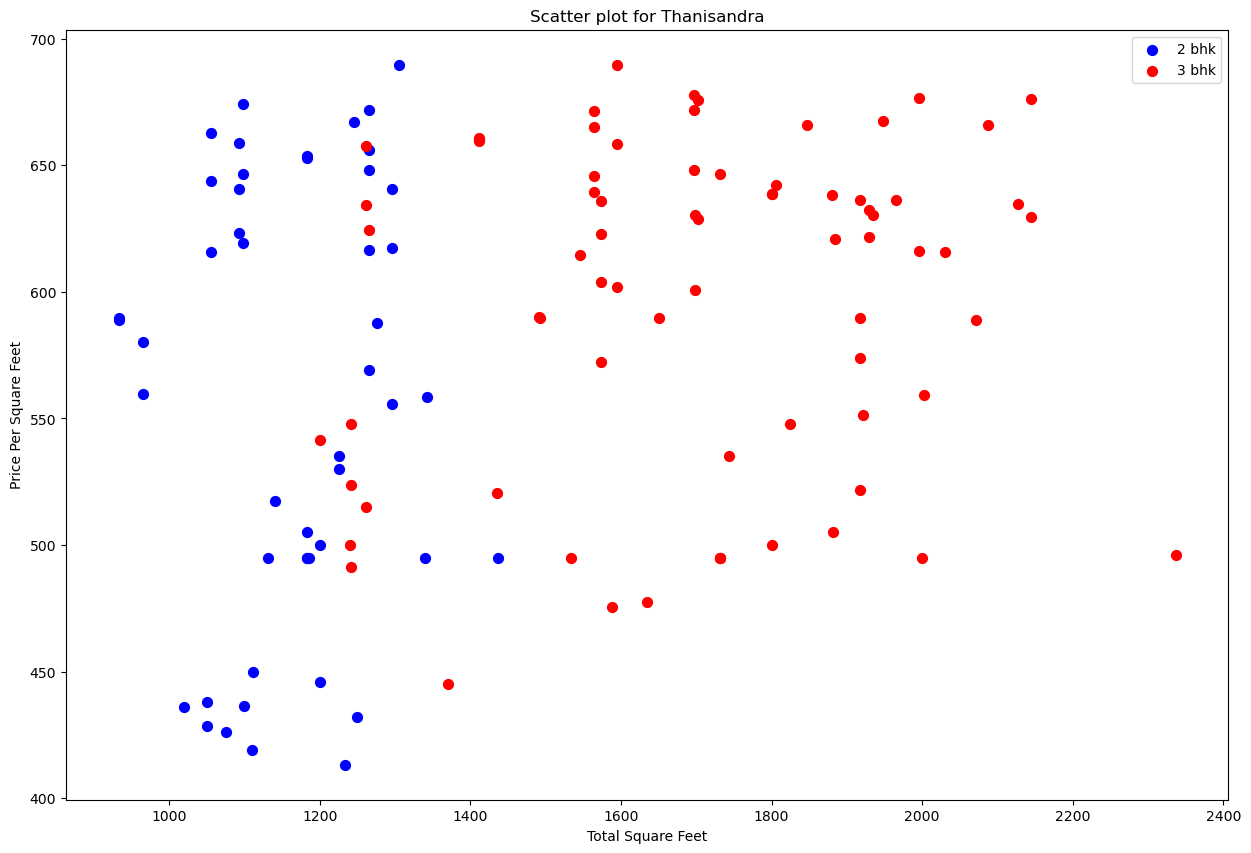

In [29]:
import matplotlib.pyplot as plt

def plot_scatter_plot(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.figure(figsize=(15, 10)) # Correcting the typo in 'figsize'
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqrt, color='blue', label='2 bhk',s=50)  # Correcting 'label'
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqrt, color='red', label='3 bhk',s=50)   # Correcting 'label'
    plt.xlabel('Total Square Feet')
    plt.ylabel('Price Per Square Feet')
    plt.title(f'Scatter plot for {location}')
    plt.legend()
    plt.show()

plot_scatter_plot(df7, 'Thanisandra')
  
    
    

In [30]:
def removed_bhk_outliner(df):
    exculded_indices=np.array([])
    for locatiion,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
            'mean':np.mean(bhk_df.price_per_sqrt),
            'std':np.std(bhk_df.price_per_sqrt),
            'count':bhk_df.shape[0]}
        for bhk,bhk_df in location_df.groupby('bhk'):
            stat=bhk_stats.get(bhk-1)
            if stat and stat['count']>5:
                exculded_indices=np.append(exculded_indices,bhk_df[bhk_df.price_per_sqrt<(stat['mean'])].index.values)
       
    return df.drop(exculded_indices,axis="index")
df8=removed_bhk_outliner(df7)
                
                

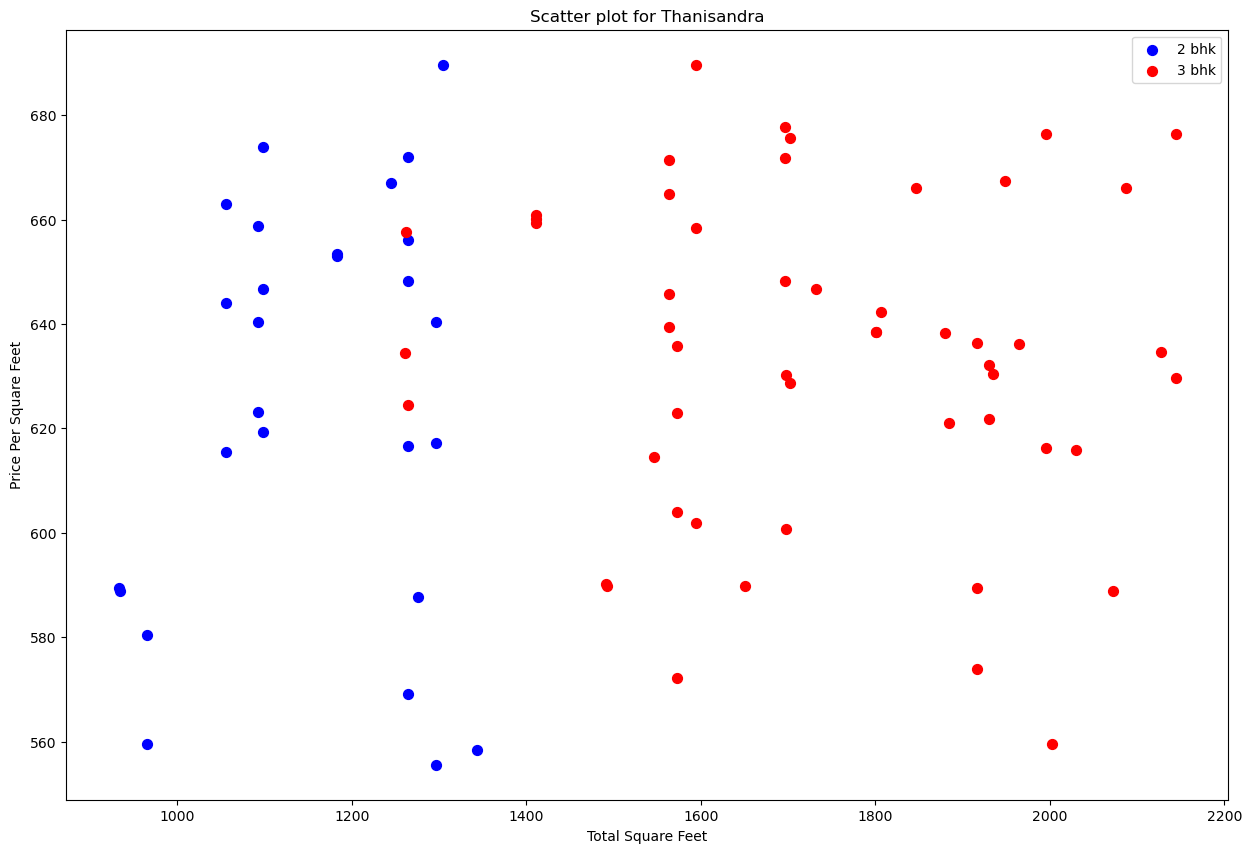

In [31]:

plot_scatter_plot(df8, 'Thanisandra')

(array([3.188e+03, 5.157e+03, 5.620e+02, 2.060e+02, 1.020e+02, 3.200e+01,
        1.300e+01, 3.000e+00, 1.000e+00, 2.000e+00]),
 array([ 125. ,  462.5,  800. , 1137.5, 1475. , 1812.5, 2150. , 2487.5,
        2825. , 3162.5, 3500. ]),
 <BarContainer object of 10 artists>)

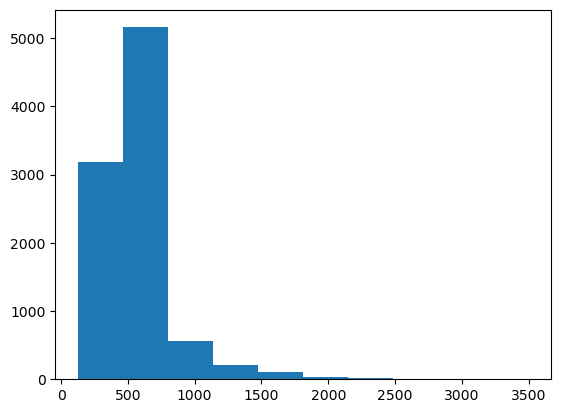

In [32]:
plt.hist(df7.price_per_sqrt)

(array([5.964e+03, 2.354e+03, 5.960e+02, 3.070e+02, 2.200e+01, 1.500e+01,
        6.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <BarContainer object of 10 artists>)

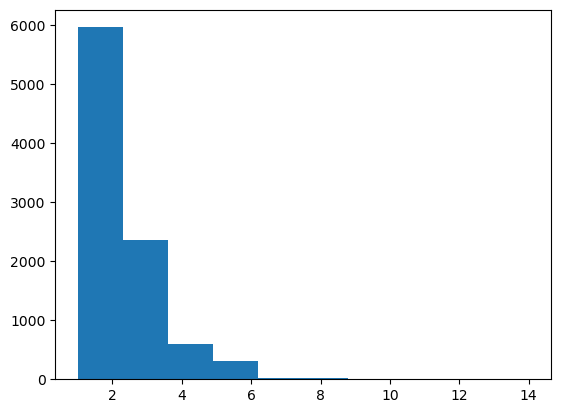

In [33]:
plt.hist(df7.bath)

In [34]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7424, 7)

In [35]:
df10 = df9.drop(['size', 'price_per_sqrt'], axis='columns')
dummies=pd.get_dummies(df10.location)
dummies=dummies.astype(int)
dummies.head()

,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,1st Stage Indira Nagar,2nd Block Hrbr Layout,2nd Block Jayanagar,2nd Phase JP Nagar,...,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,cooketown,frazertown,manyata park,south,tc.palya
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df11=pd.concat([df10,dummies.drop('south',axis="columns")],axis="columns")


In [38]:
df12=df11.drop('location',axis="columns")
df12.head()

,total_sqft,bath,price,bhk,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,cooketown,frazertown,manyata park,tc.palya
0,1800.0,5.0,250.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,600.0,1.0,45.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3150.0,4.0,150.0,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2300.0,3.0,80.0,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1250.0,2.0,67.0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df12.shape

(7424, 759)

In [40]:
x=df12.drop('price',axis='columns')
x.shape

(7424, 758)

In [41]:
y=df12.price
y.head()

0    250.0
1     45.0
2    150.0
3     80.0
4     67.0
Name: price, dtype: float64

In [42]:
#train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [43]:
from sklearn.linear_model import LinearRegression
ln=LinearRegression()
ln.fit(x_train,y_train)
ln.score(x_test,y_test)

-1.3462611695915221e+17

In [44]:
x.shape

(7424, 758)

In [45]:
#k fold cluster validation

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=10)
cross_val_score(LinearRegression(),x,y,cv=cv)


array([-1.34626117e+17,  7.42674657e-01, -1.44359553e+15,  6.23932786e-01,
       -2.06201546e+15])

In [46]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearch(x, y):
    algos = {
        'linear_regression': {
            "model": LinearRegression(),
            "params": {
                
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            "model": algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Assuming x and y are already defined
find_best_model_using_gridsearch(x, y)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\

,model,best_score,best_params
0,linear_regression,-2.762635e+16,{}
1,lasso,6.157601e-01,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,7.000676e-01,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [47]:
x.shape

(7424, 758)

In [48]:
def predict(location,sqft,bath,bhk):
    #to inde the location because we put it in dummies and its 243 columns
    loc_index=np.where(x.columns==location)[0][0]
    x_input=np.zeros(len(x.columns))
    x_input[0]=sqft
    x_input[1]=bath
    x_input[2]=bhk
    if loc_index >=0:
        x_input[loc_index]=1
    return ln.predict([x_input])[0]

In [51]:
predict('Vishveshwarya Layout',5000,6,3)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


365.00951576395335

In [52]:
x.shape

(7424, 758)

In [55]:
import json
columns={
    "data_columns":[col.lower( )for col in x.columns]
}
with open('coloumns.json','w')as f:
    
    f.write(json.dumps(columns))

In [56]:
import pickle 
with open("Bengaluru_House_Data.pickle","wb") as f:
    pickle.dump(ln,f)